# YOLO 分类模型测试

这个 notebook 用于测试训练好的 YOLO 分类模型，判断图片是类别 0 还是类别 1。

In [1]:
from ultralytics import YOLO
import os
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
from tqdm import tqdm

# 加载训练好的模型
model_path = "/home/visuals/Code/yolo/runs/classify/train41/weights/best.pt"

# 检查模型是否存在
if os.path.exists(model_path):
    print(f"加载模型: {model_path}")
    model = YOLO(model_path)
else:
    print(f"错误: 模型文件不存在: {model_path}")
    raise FileNotFoundError(f"找不到模型文件: {model_path}")

加载模型: /home/visuals/Code/yolo/runs/classify/train41/weights/best.pt


## 单张图片测试

In [2]:
def predict_single_image(image_path):
    """预测单张图片的类别"""
    # 加载并显示图片
    img = cv2.imread(image_path)
    if img is None:
        print(f"错误: 无法读取图片: {image_path}")
        return None, None, None
        
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(f"测试图片: {os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()
    
    # 执行预测
    results = model(image_path)
    
    # 获取预测结果
    pred_class = results[0].probs.top1  # 预测的类别
    confidence = results[0].probs.top1conf.item()  # 置信度
    probs = results[0].probs.data.tolist()  # 所有类别的概率
    
    # 打印结果
    print(f"预测类别: {pred_class}")
    print(f"置信度: {confidence:.4f}")
    print(f"类别0概率: {probs[0]:.4f}")
    print(f"类别1概率: {probs[1]:.4f}")
    
    # 可视化概率分布
    plt.figure(figsize=(8, 4))
    bars = plt.bar(['类别0', '类别1'], probs, color=['blue', 'orange'])
    plt.ylim(0, 1)
    plt.ylabel('概率')
    plt.title('预测概率分布')
    
    # 在柱状图上显示具体数值
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom')
    
    plt.show()
    
    return pred_class, confidence, probs

/home/visuals/anaconda3/envs/yolo-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/visuals/anaconda3/envs/yolo-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/visuals/anaconda3/envs/yolo-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/visuals/anaconda3/envs/yolo-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


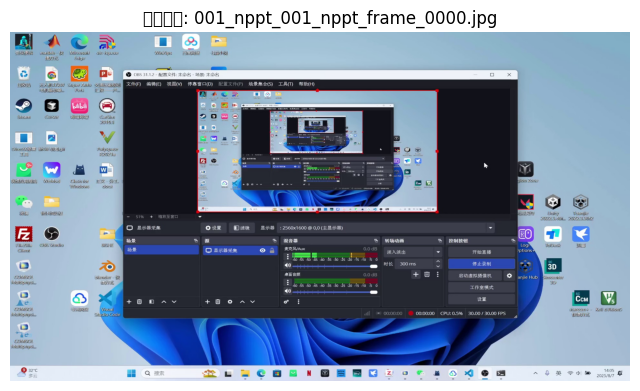


image 1/1 /home/visuals/Code/datasets/ppt_dataset/train/0/001_nppt_001_nppt_frame_0000.jpg: 416x416 0 1.00, 1 0.00, 7.1ms
Speed: 24.0ms preprocess, 7.1ms inference, 0.1ms postprocess per image at shape (1, 3, 416, 416)
image 1/1 /home/visuals/Code/datasets/ppt_dataset/train/0/001_nppt_001_nppt_frame_0000.jpg: 416x416 0 1.00, 1 0.00, 7.1ms
Speed: 24.0ms preprocess, 7.1ms inference, 0.1ms postprocess per image at shape (1, 3, 416, 416)
预测类别: 0
置信度: 1.0000
类别0概率: 1.0000
类别1概率: 0.0000
预测类别: 0
置信度: 1.0000
类别0概率: 1.0000
类别1概率: 0.0000


/home/visuals/anaconda3/envs/yolo-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/visuals/anaconda3/envs/yolo-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/visuals/anaconda3/envs/yolo-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/visuals/anaconda3/envs/yolo-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/visuals/anaconda3/envs/yolo-env/lib/python3.9/site-packages/IPytho

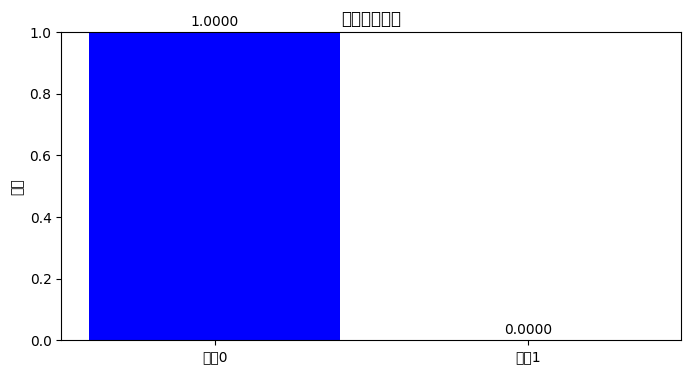

In [ ]:
# 测试单张图片 - 输入图片路径
image_path ="/home/visuals/Code/datasets/ppt_dataset/train/1/001_ppt_001_ppt_frame_0003.jpg"

if os.path.exists(image_path):
    predict_single_image(image_path)
else:
    print(f"错误: 图片不存在: {image_path}")

## 批量测试文件夹中的图片

In [ ]:
def predict_folder(folder_path, limit=None):
    """预测文件夹中的所有图片"""
    # 获取所有图片文件
    image_files = []
    for ext in ['jpg', 'jpeg', 'png']:
        image_files.extend(glob.glob(os.path.join(folder_path, f"*.{ext}")))
    
    # 如果设置了限制，只取前N张图片
    if limit and limit > 0:
        image_files = image_files[:limit]
    
    if not image_files:
        print(f"错误: 在 {folder_path} 中未找到图片文件")
        return {}, []
    
    print(f"开始预测 {len(image_files)} 张图片...")
    
    # 统计结果
    results_dict = {0: 0, 1: 0}
    predictions = []
    
    # 处理每张图片
    for img_path in tqdm(image_files):
        # 预测
        results = model(img_path)
        
        # 获取预测的类别
        pred_class = results[0].probs.top1
        confidence = results[0].probs.top1conf.item()
        probs = results[0].probs.data.tolist()
        
        # 统计
        results_dict[pred_class] += 1
        
        # 保存结果
        predictions.append({
            'path': img_path,
            'filename': os.path.basename(img_path),
            'pred_class': pred_class,
            'confidence': confidence,
            'probs': probs
        })
    
    return results_dict, predictions

In [ ]:
# 输入要测试的文件夹路径
folder_path = input("请输入要测试的图片文件夹路径: ")

if os.path.exists(folder_path) and os.path.isdir(folder_path):
    # 可以限制测试图片数量，避免处理过多图片
    limit = input("要限制测试图片数量吗？输入数字限制数量，直接回车测试所有图片: ")
    limit = int(limit) if limit.strip() and limit.isdigit() else None
    
    results_dict, predictions = predict_folder(folder_path, limit)
    
    # 打印统计结果
    print("\n统计结果:")
    total = sum(results_dict.values())
    if total > 0:
        print(f"类别0: {results_dict[0]}张图片 ({results_dict[0]/total:.2%})")
        print(f"类别1: {results_dict[1]}张图片 ({results_dict[1]/total:.2%})")
        print(f"总计: {total}张图片")
    else:
        print("没有处理任何图片")
else:
    print(f"错误: 文件夹不存在或不是目录: {folder_path}")

## 显示部分预测结果

In [ ]:
# 显示一些预测结果（如果上面的代码已经运行过）
try:
    # 每个类别显示几张图片
    num_samples = 3
    
    # 按类别分组
    class0_preds = [p for p in predictions if p['pred_class'] == 0][:num_samples]
    class1_preds = [p for p in predictions if p['pred_class'] == 1][:num_samples]
    
    # 显示类别0的预测结果
    if class0_preds:
        print("\n预测为类别0的图片:")
        for pred in class0_preds:
            img = cv2.imread(pred['path'])
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                plt.figure(figsize=(8, 6))
                plt.imshow(img_rgb)
                plt.title(f"文件: {pred['filename']}\n预测: 类别{pred['pred_class']} (置信度: {pred['confidence']:.4f})")
                plt.axis('off')
                plt.show()
    
    # 显示类别1的预测结果
    if class1_preds:
        print("\n预测为类别1的图片:")
        for pred in class1_preds:
            img = cv2.imread(pred['path'])
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
                plt.figure(figsize=(8, 6))
                plt.imshow(img_rgb)
                plt.title(f"文件: {pred['filename']}\n预测: 类别{pred['pred_class']} (置信度: {pred['confidence']:.4f})")
                plt.axis('off')
                plt.show()
except NameError:
    print("请先运行批量预测单元格")

## 导出预测结果

In [ ]:
# 将结果导出到CSV文件
try:
    import pandas as pd
    
    # 转换为DataFrame
    df = pd.DataFrame([
        {
            '文件名': p['filename'],
            '预测类别': p['pred_class'],
            '置信度': p['confidence'],
            '类别0概率': p['probs'][0],
            '类别1概率': p['probs'][1]
        } for p in predictions
    ])
    
    # 显示结果表格
    display(df.head(10))  # 显示前10行
    
    # 导出到CSV
    output_file = "prediction_results.csv"
    df.to_csv(output_file, index=False, encoding='utf-8-sig')  # 使用UTF-8-BOM编码以支持Excel正确显示中文
    print(f"\n结果已导出到: {output_file}")
except NameError:
    print("请先运行批量预测单元格")
except ImportError:
    print("需要安装pandas: pip install pandas")